# Get population bias in silico

## Setup environment
   
    ```bash
    # clone Buccino 2020's kilosort2 commit version in sorters_packages/
    git clone https://github.com/MouseLand/Kilosort2
    git checkout -q 48bf2b81d8ad
    ```

    # activate spack environment
    ```bash
    module load unstable hpe-mpi/2.25.hmpt matlab
    module load spack
    cd /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/
    . /gpfs/bbp.cscs.ch/ssd/apps/bsd/2022-01-10/spack/share/spack/setup-env.sh
    spack env activate spack_env -p
    spack load python@3.9.7
    ```
    
    ```bash
    # create virtual env
    rm -rf ~/.cache/pip  # clear pip cache
    python3.9 -m venv kilosort_silico
    source kilosort_silico/bin/activate
    pip3.9 install -r requirements_kilosort_silico.txt
    ```
    
    # install bluepy to read in-silico simulation
    Move to your home directory e.g., /gpfs/bbp.cscs.ch/home/laquitai (where you have have pip install permission).
    Then clone bluepy and checkout branch lfp-reports. Make sure your ssh private key has been setup before for authentication to Gitlab.

    ```bash
    cp -r /gpfs/bbp.cscs.ch/home/tharayil/bluepy-configfile ~/       # copy bluepy-config
    pip3.9 install --user ~/bluepy-configfile/                       # install
    git clone git@bbpgitlab.epfl.ch:nse/bluepy.git ~/ .              # clone in home path
    cd ~/bluepy/
    git checkout lfp-reports                                         # checkout the lfp package
    pip3.9 install .                                                 # install
    cd /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/ # move back to project path
    ```

    # setup GPU for matlab
    ```bash
    cd sorters_packages/Kilosort2/CUDA/
    matlab -batch mexGPUall
    cd ../../../
    ```

In [32]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os 

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
os.chdir(PROJ_PATH)

2023-02-07 16:53:53,925 - root - utils.py - get_config - INFO - Loaded config
Setting KILOSORT2_PATH environment variable for subprocess calls to: /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/sorters_packages/Kilosort2
Setting KILOSORT3_PATH environment variable for subprocess calls to: /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/sorters_packages/Kilosort3
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


getting recording
2023-02-07 16:54:10,049 - root - run_population_bias_silico.py - run - INFO - loading already processed recording
2023-02-07 16:54:10,069 - root - run_population_bias_silico.py - run - INFO - loading already processed recording done: 0.0
2023-02-07 16:54:10,092 - root - run_population_bias_silico.py - run - INFO - loading already processed true sorting
2023-02-07 16:54:10,163 - root - run_population_bias_silico.py - run - INFO - loading already processed true sorting - done: 0.1
2023-02-07 16:54:10,165 - root - run_population_bias_silico.py - run - INFO - loading kilosort3 sorting
2023-02-07 16:54:10,184 - root - run_population_bias_silico.py - run - INFO - loading kilosort3 sorting - done: 0.0


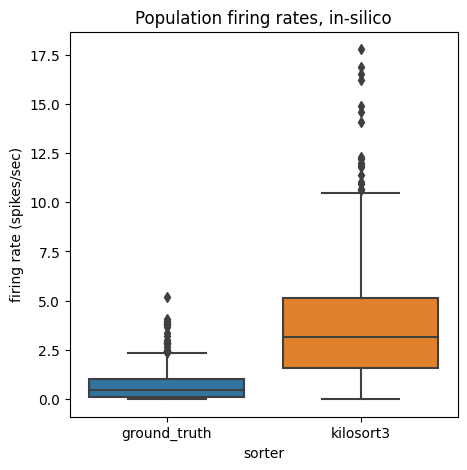

In [34]:
from src.pipes.sorting import run_population_bias_silico_neuropixels_2023_02_19
fig = run_population_bias_silico_neuropixels_2023_02_19.run()